<a href="https://colab.research.google.com/github/kamiru21/Predicting-diabetes-using-a-neural-network/blob/main/predictiondiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Pre-processing: Standardization

To ensure the neural network converges efficiently, I applied Z-Score Normalization using Scikit-Learn's StandardScaler.

The Formula:

z=
σ
x−μ
​

Where μ is the mean and σ is the standard deviation.

Top of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  

X Tensor Shape: torch.Size([768, 8])
y Tensor Shape: torch.Size([768, 1])
Original first row: [  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
Scaled first row: [ 0.63994724  0.8483238   0.14964075  0.90726995 -0.6928906   0.20401277
  0.46849197  1.4259953 ]
DiabetesModel(
  (layer1): Linear(in_features=8, out_features=12, bias=True)
  (layer2): Linear(in_fe

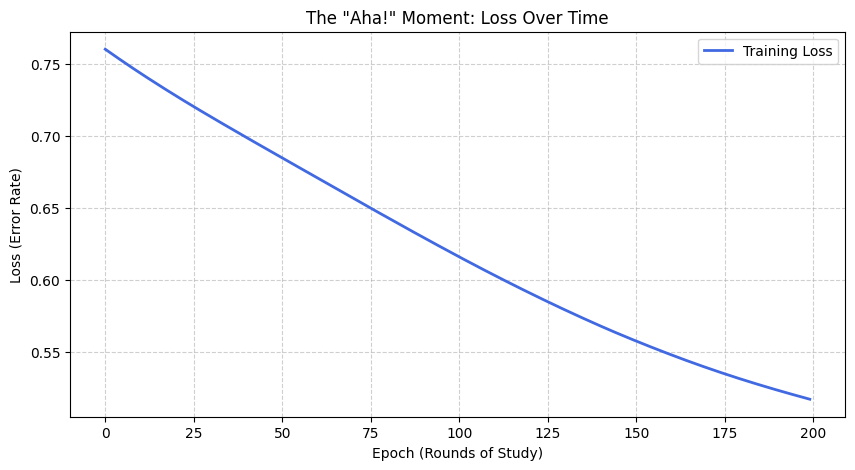

In [5]:


import pandas as pd
import torch

# The URL to the raw CSV file
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Define column names (standard for this dataset)
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'Pedigree', 'Age', 'Outcome']

# Load using Pandas
df = pd.read_csv(url, names=columns)

# Peek at the first 5 rows
print("Top of the dataset:")
print(df.head())

# 1. Separate features (X) and target (y)
X_data = df.drop('Outcome', axis=1).values  # Everything except the last column
y_data = df['Outcome'].values               # Only the last column

# 2. Convert to PyTorch Tensors
# We use float32 for X (math) and float32 for y (probability)
X = torch.tensor(X_data, dtype=torch.float32)
y = torch.tensor(y_data, dtype=torch.float32).reshape(-1, 1)

print(f"\nX Tensor Shape: {X.shape}") # Should be (768, 8)
print(f"y Tensor Shape: {y.shape}") # Should be (768, 1)

from sklearn.preprocessing import StandardScaler

# 1. Initialize the Scaler
scaler = StandardScaler()

# 2. Fit and Transform the feature data
# This calculates the mean and standard deviation for every column
X_scaled_data = scaler.fit_transform(X_data)

# 3. Convert the scaled data to a PyTorch Tensor
X = torch.tensor(X_scaled_data, dtype=torch.float32)

print("Original first row:", X_data[0])
print("Scaled first row:", X[0].numpy())

import torch.nn as nn

class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        # Layer 1: Takes 8 inputs, outputs 12 features
        self.layer1 = nn.Linear(8, 12)
        # Layer 2: Takes 12, outputs 1 (the final prediction)
        self.layer2 = nn.Linear(12, 1)
        # Activation: Squashes the output between 0 and 1 (probability)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x)) # "ReLU" helps the network learn non-linear patterns
        x = self.sigmoid(self.layer2(x))
        return x

# Initialize the model
model = DiabetesModel()
print(model)

import matplotlib.pyplot as plt

# Define Loss and Optimizer
criterion = nn.BCELoss() # Binary Cross-Entropy Loss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimizer with a learning rate

# 1. Initialize lists to store progress
loss_history = []

# 2. Re-run a quick training loop
for epoch in range(200):
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save the loss value for the graph
    loss_history.append(loss.item())

# 3. Plot the results
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='royalblue', linewidth=2)
plt.title('The "Aha!" Moment: Loss Over Time')
plt.xlabel('Epoch (Rounds of Study)')
plt.ylabel('Loss (Error Rate)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()